In [1]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING  --disable_caching mode_expansion_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s mode_expansion_Scene"

Jupyter Capture Output v0.0.11


In [32]:
# parameters
L = 1
A = 1


# individual elements of the mode expansion
def get_mode(n):
	def mode(x):
		c = (-1)**(n-1) * (8*A) / (2*n - 1)**2 / np.pi**2
		return c * np.sin(np.pi/L * (2*n -1) * x)
	return mode


# returns the normal modes
def get_mode_expansion(n):
	def mode_expansion(x):
		Psi = 0
		for j in range(1, n+1):
			mode_j = get_mode(j)
			Psi += mode_j(x)
		return Psi
	return mode_expansion

Manim Community v0.18.1

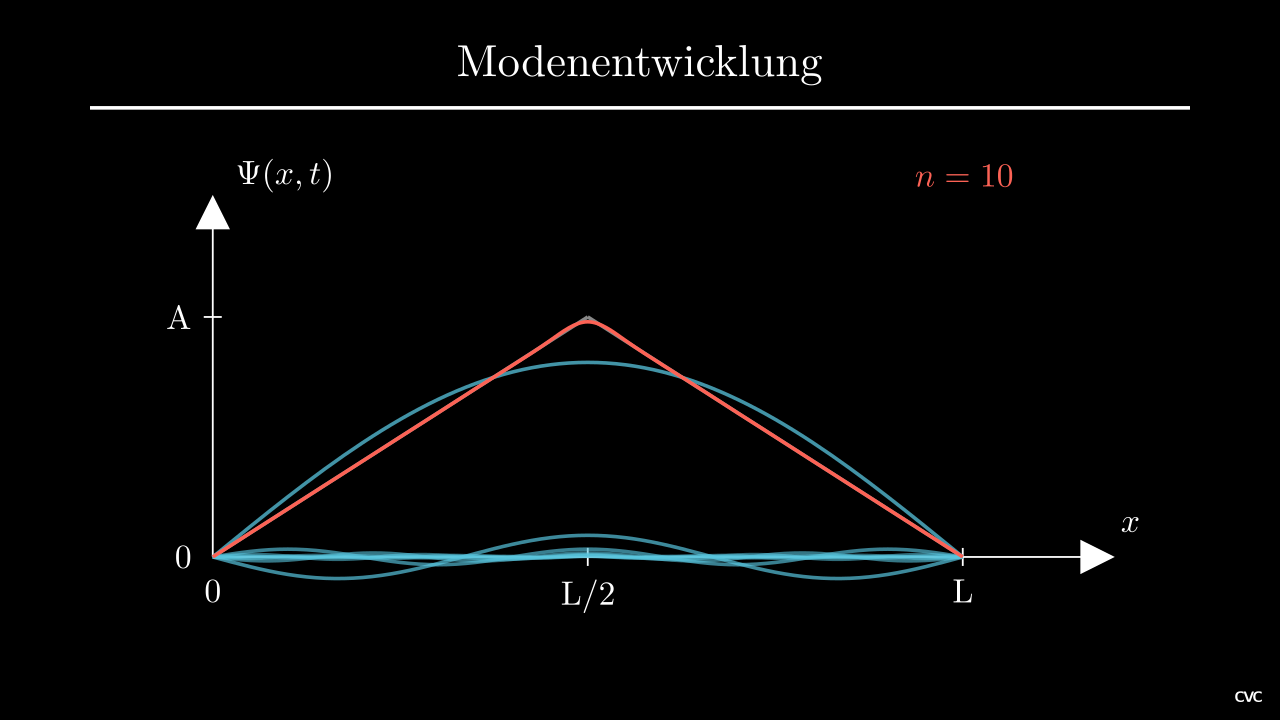

In [67]:
%%manim -qm --fps 60 $video_scene

class mode_expansion_Scene(Scene):
	def construct(self):
		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

		# headline
		headline = Title(r"Modenentwicklung", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
		self.add(headline)


		# coordinate system
		x_length = 10
		y_length = 4
		x_range = [0, 1.2*L, L/2]
		y_range = [0, 1.5*A, A]

		x_dict = dict(zip([0, L/2, L], [r"0", r"L/2", r"L"]))
		y_dict = dict(zip([0, A], [r"0", r"A"]))

		ax = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True}).add_coordinates(x_dict, y_dict).move_to([0, -0.5, 0])
		ax_xlabel = ax.get_x_axis_label(Tex(r"$x$", font_size = 36, color = WHITE))
		ax_ylabel = ax.get_y_axis_label(Tex(r"$\Psi(x, t)$", font_size = 36, color = WHITE))
		self.add(ax, ax_xlabel, ax_ylabel)


		# rope
		left_rope = ax.plot(lambda x: 2*A/L*x, x_range = [0, L/2], color = GRAY)
		right_rope = ax.plot(lambda x: 2*A-2*A/L*x, x_range = [L/2, L], color = GRAY)
		self.add(left_rope, right_rope)


		# mode expansion
		n = 10

		# individual elements
		for j in range(1, n+1):
			mode = get_mode(j)
			opacity = 0.25 + (n-j+1) / (2*n)
			plot_mode = ax.plot(mode, x_range = [0, L], color = BLUE, stroke_opacity = opacity)
			self.add(plot_mode)

		# complete mode expansion
		mode_expansion = get_mode_expansion(n)
		plot_mode_expansion = ax.plot(mode_expansion, x_range = [0, L], color = RED)
		self.add(plot_mode_expansion)


		# legend
		n_text = Tex(f"$n={n}$", font_size = 36, color = RED).next_to(ax_ylabel, 26*RIGHT)
		self.add(n_text)